In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
#import dataset
h1bdf = pd.read_csv("h1b.csv")

In [3]:
#view columns in the dataset
h1bdf.columns

Index(['Unnamed: 0', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

In [4]:
#check for missing values in the columns
h1bdf.apply(lambda x: sum(x.isnull()), axis =0)

Unnamed: 0                 0
CASE_STATUS               13
EMPLOYER_NAME             59
SOC_NAME               17734
JOB_TITLE                 43
FULL_TIME_POSITION        15
PREVAILING_WAGE           85
YEAR                      13
WORKSITE                   0
lon                   107242
lat                   107242
dtype: int64

In [5]:
print(len(h1bdf))

3002458


In [6]:
#dropping rows with null values
h1bdf = h1bdf.dropna()
print(len(h1bdf))

2877765


In [7]:
#Unnamed: 0 column is just a numbering so deleting it
del h1bdf['Unnamed: 0']


In [8]:
h1bdf.columns

Index(['CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

In [9]:
#resetting the index
h1bdf.reset_index()


,index,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.00,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.00,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.00,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.00,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.40,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003
5,5,CERTIFIED-WITHDRAWN,BURGER KING CORPORATION,CHIEF EXECUTIVES,"EXECUTIVE V P, GLOBAL DEVELOPMENT AND PRESIDEN...",Y,225000.00,2016.0,"MIAMI, FLORIDA",-80.191790,25.761680
6,6,CERTIFIED-WITHDRAWN,BT AND MK ENERGY AND COMMODITIES,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,91021.00,2016.0,"HOUSTON, TEXAS",-95.369803,29.760427
7,7,CERTIFIED-WITHDRAWN,"GLOBO MOBILE TECHNOLOGIES, INC.",CHIEF EXECUTIVES,CHIEF OPERATIONS OFFICER,Y,150000.00,2016.0,"SAN JOSE, CALIFORNIA",-121.886329,37.338208
8,9,WITHDRAWN,LESSARD INTERNATIONAL LLC,CHIEF EXECUTIVES,PRESIDENT,Y,154648.00,2016.0,"VIENNA, VIRGINIA",-77.265260,38.901222
9,10,CERTIFIED-WITHDRAWN,H.J. HEINZ COMPANY,CHIEF EXECUTIVES,"CHIEF INFORMATION OFFICER, HEINZ NORTH AMERICA",Y,182978.00,2016.0,"PITTSBURGH, PENNSYLVANIA",-79.995886,40.440625


In [10]:
#gets the states from Worksite column
h1bdf['STATE'] = h1bdf.apply(lambda x: x['WORKSITE'].split(',')[-1],1)

In [11]:
h1bdf['STATE'].value_counts()

 CALIFORNIA              548539
 TEXAS                   286704
 NEW YORK                282429
 NEW JERSEY              206876
 ILLINOIS                154843
 MASSACHUSETTS           112659
 PENNSYLVANIA            103729
 WASHINGTON              100754
 FLORIDA                 100384
 GEORGIA                  99679
 VIRGINIA                 86948
 MICHIGAN                 77868
 NORTH CAROLINA           75701
 OHIO                     71765
 MARYLAND                 53145
 CONNECTICUT              48174
 MINNESOTA                45864
 ARIZONA                  40184
 MISSOURI                 32737
 WISCONSIN                30485
 COLORADO                 30231
 INDIANA                  28230
 TENNESSEE                25906
 OREGON                   22759
 DISTRICT OF COLUMBIA     22408
 DELAWARE                 17705
 IOWA                     15143
 ARKANSAS                 13775
 KANSAS                   12331
 UTAH                     12162
 RHODE ISLAND             11316
 SOUTH C

In [12]:
h1bdf['STATE'].unique()
print((h1bdf['STATE'].unique())) #There are 53 states of which one is NA.


[' MICHIGAN' ' TEXAS' ' NEW JERSEY' ' COLORADO' ' MISSOURI' ' FLORIDA'
 ' CALIFORNIA' ' VIRGINIA' ' PENNSYLVANIA' ' WISCONSIN' ' ILLINOIS'
 ' DISTRICT OF COLUMBIA' ' NORTH CAROLINA' ' RHODE ISLAND' ' OHIO'
 ' WASHINGTON' ' GEORGIA' ' NEW YORK' ' INDIANA' ' MARYLAND'
 ' MASSACHUSETTS' ' NEVADA' ' NEW HAMPSHIRE' ' LOUISIANA' ' MINNESOTA'
 ' SOUTH CAROLINA' ' ARIZONA' ' TENNESSEE' ' HAWAII' ' UTAH' ' DELAWARE'
 ' NA' ' KANSAS' ' CONNECTICUT' ' MAINE' ' OKLAHOMA' ' ARKANSAS'
 ' PUERTO RICO' ' ALASKA' ' IOWA' ' OREGON' ' KENTUCKY' ' NEBRASKA'
 ' NEW MEXICO' ' WEST VIRGINIA' ' SOUTH DAKOTA' ' NORTH DAKOTA'
 ' MISSISSIPPI' ' ALABAMA' ' VERMONT' ' IDAHO' ' WYOMING' ' MONTANA']


In [13]:
#remove whitespaces in STATE
h1bdf['STATE'] = h1bdf['STATE'].map(str.strip)
print((h1bdf['STATE'].unique()))

['MICHIGAN' 'TEXAS' 'NEW JERSEY' 'COLORADO' 'MISSOURI' 'FLORIDA'
 'CALIFORNIA' 'VIRGINIA' 'PENNSYLVANIA' 'WISCONSIN' 'ILLINOIS'
 'DISTRICT OF COLUMBIA' 'NORTH CAROLINA' 'RHODE ISLAND' 'OHIO' 'WASHINGTON'
 'GEORGIA' 'NEW YORK' 'INDIANA' 'MARYLAND' 'MASSACHUSETTS' 'NEVADA'
 'NEW HAMPSHIRE' 'LOUISIANA' 'MINNESOTA' 'SOUTH CAROLINA' 'ARIZONA'
 'TENNESSEE' 'HAWAII' 'UTAH' 'DELAWARE' 'NA' 'KANSAS' 'CONNECTICUT' 'MAINE'
 'OKLAHOMA' 'ARKANSAS' 'PUERTO RICO' 'ALASKA' 'IOWA' 'OREGON' 'KENTUCKY'
 'NEBRASKA' 'NEW MEXICO' 'WEST VIRGINIA' 'SOUTH DAKOTA' 'NORTH DAKOTA'
 'MISSISSIPPI' 'ALABAMA' 'VERMONT' 'IDAHO' 'WYOMING' 'MONTANA']


In [14]:
#replace NA with MARIANA ISLANDS
def replace_NA(row):             
    if (row=='NA'):               
        return 'MARIANA ISLANDS'
    return row
h1bdf['STATE'] = h1bdf['STATE'].apply(lambda row: replace_NA(row))
#print((h1bdf['STATE'].unique()))
print(len(h1bdf['STATE'].unique()))

53


Initial Exploration: Exploring the CASE_STATUS feature.

In [15]:
#petitions filed per state
states = ['ALABAMA','ALASKA','ARIZONA','ARKANSAS','CALIFORNIA','COLORADO',
             'CONNECTICUT','DELAWARE','DISTRICT OF COLUMBIA','FLORIDA','GEORGIA',
             'HAWAII','IDAHO','ILLINOIS','INDIANA','IOWA','KANSAS','KENTUCKY',
             'LOUISIANA','MAINE','MARIANA ISLANDS','MARYLAND','MASSACHUSETTS',
             'MICHIGAN','MINNESOTA','MISSISSIPPI','MISSOURI','MONTANA','NEBRASKA',
             'NEVADA','NEW HAMPSHIRE','NEW JERSEY','NEW MEXICO','NEW YORK',
             'NORTH CAROLINA','NORTH DAKOTA','OHIO','OKLAHOMA','OREGON',
             'PENNSYLVANIA','PUERTO RICO','RHODE ISLAND','SOUTH CAROLINA',
             'SOUTH DAKOTA','TENNESSEE','TEXAS','UTAH','VERMONT','VIRGINIA',
             'WASHINGTON','WEST VIRGINIA','WISCONSIN','WYOMING']
petitions_per_state = [0]*53 # filed petitions distribution by state
for i in range (0,53):
    petitions_per_state[i] = h1bdf[h1bdf.STATE==states[i]]['STATE'].count() 
dist_state = pd.DataFrame()
dist_state['STATE'] = states
dist_state['FILED PETITIONS'] = petitions_per_state 
print((petitions_per_state))
#dist_state.columns

[8644, 1116, 40184, 13775, 548539, 30231, 48174, 17705, 22408, 100384, 99679, 3157, 3777, 154843, 28230, 15143, 12331, 10968, 10043, 3132, 3069, 53145, 112659, 77868, 45864, 2686, 32737, 644, 8600, 7004, 9069, 206876, 4655, 282429, 75701, 2510, 71765, 9437, 22759, 103729, 931, 11316, 11246, 1582, 25906, 286704, 12162, 1248, 86948, 100754, 2121, 30485, 693]


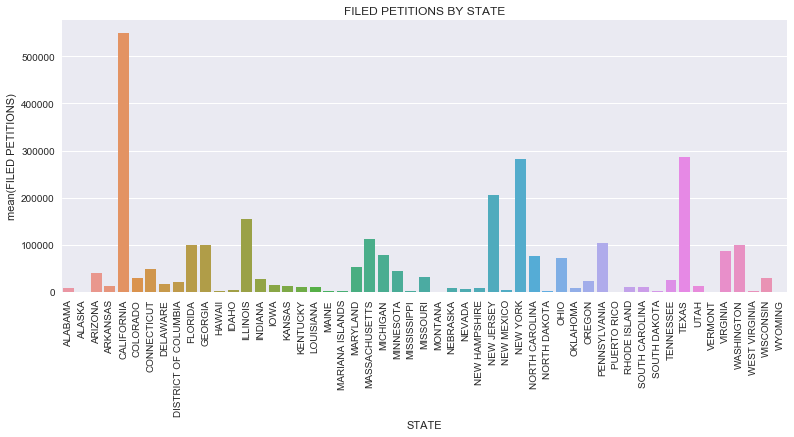

In [16]:
import seaborn as sns
sns.set_context("notebook",font_scale=1.0)
plt.figure(figsize=(13,5))
plt.title('FILED PETITIONS BY STATE')
g = sns.barplot( x='STATE', y='FILED PETITIONS', data=dist_state)
rotg = g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [17]:
denied = h1bdf[h1bdf.CASE_STATUS=='DENIED']   

In [18]:
#denied petitions per state
denied_per_state = [0]*53               
for i in range (0,53):
    denied_per_state[i] = denied[denied.STATE==states[i]]['STATE'].count()
denied_state = pd.DataFrame()
denied_state['STATE'] = states
denied_state['DENIED PETITIONS'] = denied_per_state
#print((denied_by_state)) 

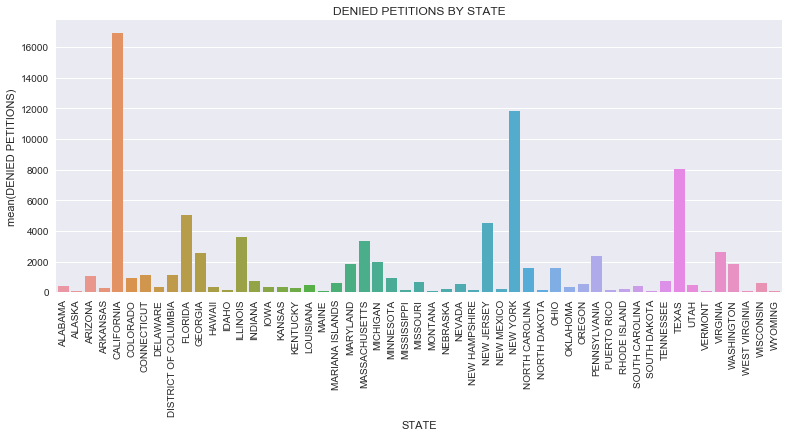

In [19]:
import seaborn as sns
sns.set_context("notebook",font_scale=1.0)
plt.figure(figsize=(13,5))
plt.title('DENIED PETITIONS BY STATE')
g = sns.barplot( x='STATE', y='DENIED PETITIONS', data=denied_state)
rotg = g.set_xticklabels(g.get_xticklabels(), rotation=90)


In [20]:
#rate of denied applications per state
rate_denied_state = [0]*53          # rate of denied petitions distributions by state  
for i in range(0,53):
    rate_denied_state[i] = float("%.2f" %((denied_per_state[i]/petitions_per_state[i])*100))

denial_percent = pd.DataFrame()
denial_percent['STATE'] = states
denial_percent['DENIED PETITIONS PERCENTAGE'] = rate_denied_state

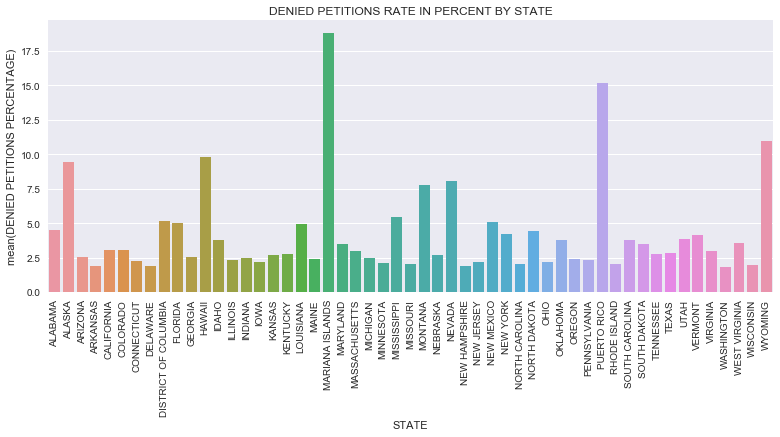

In [21]:
sns.set_context("notebook",font_scale=1.0)
plt.figure(figsize=(13,5))
plt.title('DENIED PETITIONS RATE IN PERCENT BY STATE')
g = sns.barplot( x='STATE', y='DENIED PETITIONS PERCENTAGE', data=denial_percent)
rotg = g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [22]:
#Top 10 States to file H1B
dist_state['DENIED PETITIONS'] = denied_per_state
dist_state['DENIED PETITIONS PERCENTAGE'] = rate_denied_state
dist_state = dist_state.sort_values(by='DENIED PETITIONS PERCENTAGE',ascending= True)
dist_state_top = dist_state.head(10)
dist_state_top

,STATE,FILED PETITIONS,DENIED PETITIONS,DENIED PETITIONS PERCENTAGE
49,WASHINGTON,100754,1854,1.84
30,NEW HAMPSHIRE,9069,170,1.87
3,ARKANSAS,13775,264,1.92
7,DELAWARE,17705,342,1.93
51,WISCONSIN,30485,590,1.94
26,MISSOURI,32737,669,2.04
34,NORTH CAROLINA,75701,1546,2.04
41,RHODE ISLAND,11316,231,2.04
24,MINNESOTA,45864,957,2.09
31,NEW JERSEY,206876,4488,2.17


Top Employers who have applied for H1B

In [57]:
#h1bdf['JOB_TITLE'].value_counts()
#h1bdf['JOB_TITLE'].value_counts().head(10)

In [58]:
#print(denied)

In [59]:
denied_per_employer = denied['EMPLOYER_NAME'].value_counts().head(5)


In [91]:
applied_per_employer =h1bdf['EMPLOYER_NAME'].value_counts()

In [92]:
applied_per_employer.head(10)

INFOSYS LIMITED                                    130257
TATA CONSULTANCY SERVICES LIMITED                   64273
WIPRO LIMITED                                       45673
DELOITTE CONSULTING LLP                             35999
IBM INDIA PRIVATE LIMITED                           33585
ACCENTURE LLP                                       33226
MICROSOFT CORPORATION                               25551
HCL AMERICA, INC.                                   22488
ERNST & YOUNG U.S. LLP                              18094
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION     17322
Name: EMPLOYER_NAME, dtype: int64

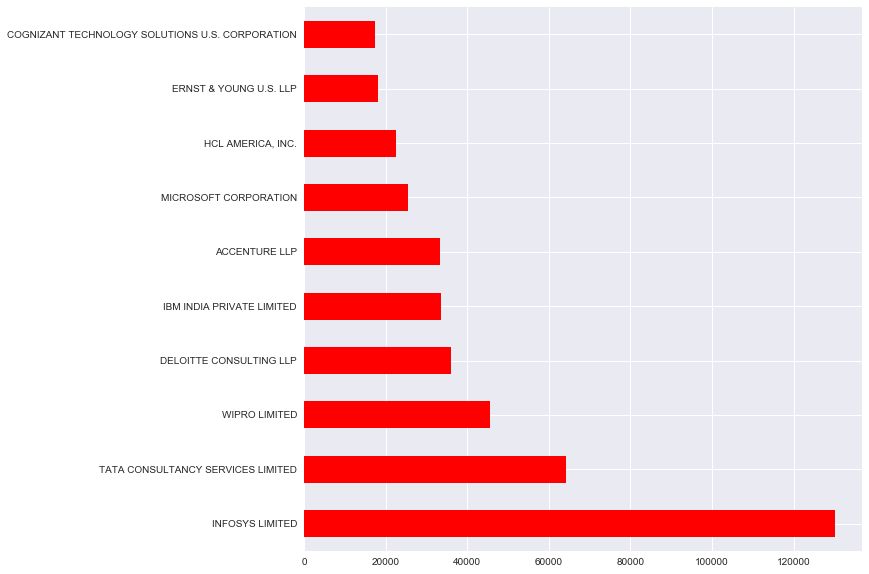

In [93]:
sns.set_context("notebook",font_scale=1.0)
plt.figure(figsize=(10,10))
applied_per_employer.sort_values(ascending=False).head(10).plot(kind='barh',color='red')

In [62]:
denied_per_employer

DELOITTE CONSULTING LLP                            543
IBM INDIA PRIVATE LIMITED                          410
ERNST & YOUNG U.S. LLP                             340
INFOSYS LIMITED                                    307
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION    237
Name: EMPLOYER_NAME, dtype: int64

In [63]:
# Indian IT Service companies have most applied for h1b's

In [64]:
# Job titles with highest demand
h1bdf_title = h1bdf['JOB_TITLE'].value_counts()
h1bdf_title.head(10)

PROGRAMMER ANALYST          243357
SOFTWARE ENGINEER           118897
COMPUTER PROGRAMMER          68696
SYSTEMS ANALYST              60754
SOFTWARE DEVELOPER           41875
BUSINESS ANALYST             38781
COMPUTER SYSTEMS ANALYST     34036
TECHNOLOGY LEAD - US         28307
SENIOR SOFTWARE ENGINEER     26617
TECHNOLOGY ANALYST - US      26010
Name: JOB_TITLE, dtype: int64

In [65]:
# We can see that the top job titles for which h1b has been filed are tech related jobs and
# related and require a very generalized skill set

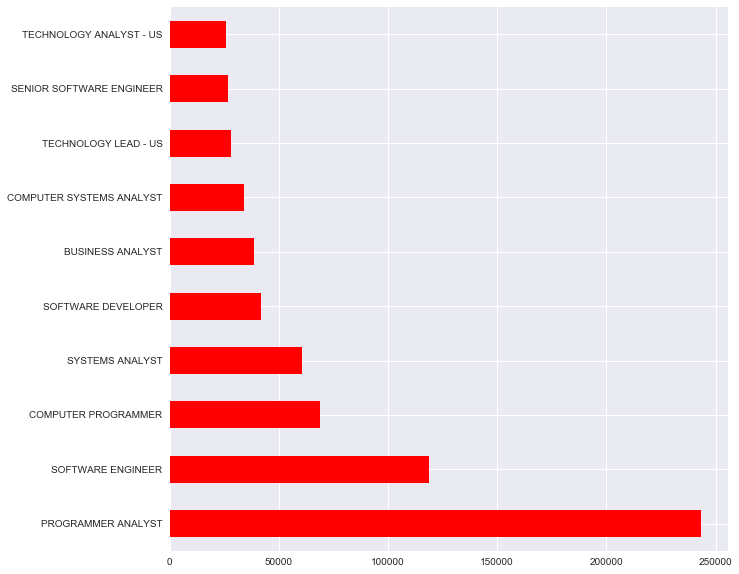

In [66]:
sns.set_context("notebook",font_scale=1.0)
plt.figure(figsize=(10,10))
h1bdf_title.sort_values(ascending=False).head(10).plot(kind='barh',color='red')

In [67]:
h1bdf_denied_title = denied['JOB_TITLE'].value_counts()
h1bdf_denied_title.head(10)

PROGRAMMER ANALYST          3427
SOFTWARE ENGINEER           2221
ACCOUNTANT                  1626
COMPUTER PROGRAMMER         1288
MARKET RESEARCH ANALYST      942
SOFTWARE DEVELOPER           922
SYSTEMS ANALYST              858
BUSINESS ANALYST             755
COMPUTER SYSTEMS ANALYST     732
FINANCIAL ANALYST            704
Name: JOB_TITLE, dtype: int64

Difference in Wages

In [68]:
h1bdf_denied_wage = denied['PREVAILING_WAGE'].median()

In [69]:
h1bdf_denied_wage

60216.0

In [70]:
certified = h1bdf[h1bdf.CASE_STATUS=='CERTIFIED'] 

In [71]:
h1bdf_certified_wage = certified['PREVAILING_WAGE'].median()

In [72]:
h1bdf_certified_wage

65312.0

In [73]:
wage_diff = h1bdf_certified_wage - h1bdf_denied_wage

In [74]:
wage_diff

5096.0

In [75]:
certified

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,STATE
18,CERTIFIED,QUICKLOGIX LLC,CHIEF EXECUTIVES,CEO,Y,187200.00,2016.0,"SANTA CLARA, CALIFORNIA",-121.955236,37.354108,CALIFORNIA
19,CERTIFIED,"MCCHRYSTAL GROUP, LLC",CHIEF EXECUTIVES,"PRESIDENT, NORTHEAST REGION",Y,241842.00,2016.0,"ALEXANDRIA, VIRGINIA",-77.046921,38.804835,VIRGINIA
22,CERTIFIED,"LOMICS, LLC",CHIEF EXECUTIVES,CEO,Y,99986.00,2016.0,"SAN DIEGO, CALIFORNIA",-117.161084,32.715738,CALIFORNIA
23,CERTIFIED,UC UNIVERSITY HIGH SCHOOL EDUCATION INC.,CHIEF EXECUTIVES,CHIEF FINANCIAL OFFICER,Y,99986.00,2016.0,"CHULA VISTA, CALIFORNIA",-117.084196,32.640054,CALIFORNIA
25,CERTIFIED,"QUICKLOGIX, INC.",CHIEF EXECUTIVES,CEO,Y,187200.00,2016.0,"SANTA CLARA, CALIFORNIA",-121.955236,37.354108,CALIFORNIA
27,CERTIFIED,HELLO INC.,CHIEF EXECUTIVES,CHIEF BUSINESS OFFICER,Y,215862.00,2016.0,"SAN FRANCISCO, CALIFORNIA",-122.419415,37.774929,CALIFORNIA
28,CERTIFIED,UMBEL CORP,CHIEF EXECUTIVES,VICE PRESIDENT OF ENGINEERING,Y,192088.00,2016.0,"AUSTIN, TEXAS",-97.743061,30.267153,TEXAS
29,CERTIFIED,"PERSPECTIVES OF FREEDOM FOUNDATION, INC",CHIEF EXECUTIVES,EXECUTIVE DIRECTOR,Y,95295.98,2016.0,"WESTON, FLORIDA",-80.399775,26.100365,FLORIDA
30,CERTIFIED,GTH INC.,CHIEF EXECUTIVES,"VICE PRESIDENT, BUSINESS DEVELOPMENT",Y,149594.00,2016.0,"WASHINGTON, DISTRICT OF COLUMBIA",-77.036871,38.907192,DISTRICT OF COLUMBIA
31,CERTIFIED,THE KRAFT HEINZ COMPANY,CHIEF EXECUTIVES,HEAD OF US SALES,Y,226699.00,2016.0,"CHICAGO, ILLINOIS",-87.629798,41.878114,ILLINOIS


In [76]:
cert_washington = certified[certified.STATE=='WASHINGTON']

In [94]:
cert_washington['EMPLOYER_NAME'].value_counts().head(5)

MICROSOFT CORPORATION    19360
INFOSYS LIMITED           8103
AMAZON CORPORATE LLC      7349
HCL AMERICA, INC.         2296
ACCENTURE LLP             1262
Name: EMPLOYER_NAME, dtype: int64

In [95]:
cert_washington_job = cert_washington[cert_washington.EMPLOYER_NAME=='MICROSOFT CORPORATION']

In [100]:
#cert_washington_job.head(5)
cert_washington_job['JOB_TITLE'].value_counts().head(5)

SOFTWARE DEVELOPMENT ENGINEER            3284
SOFTWARE ENGINEER                        3029
SOFTWARE DEVELOPMENT ENGINEER IN TEST    2957
PROGRAM MANAGER                          1136
SENIOR SOFTWARE ENGINEER                  980
Name: JOB_TITLE, dtype: int64

In [79]:
cert_newhampshire = certified[certified.STATE=='NEW HAMPSHIRE']

In [80]:
cert_newhampshire['EMPLOYER_NAME'].value_counts().head(5)

INFOSYS LIMITED                      693
DATASERV INC                         300
TATA CONSULTANCY SERVICES LIMITED    278
DARTMOUTH COLLEGE                    232
AKKEN INC                            200
Name: EMPLOYER_NAME, dtype: int64

In [102]:
cert_newhampshire_job = cert_newhampshire[cert_newhampshire.EMPLOYER_NAME=='INFOSYS LIMITED']

In [103]:
cert_newhampshire_job['JOB_TITLE'].value_counts().head(5)

TECHNOLOGY LEAD - US        163
TECHNOLOGY ANALYST - US     124
SYSTEMS ENGINEER - US        62
TEST ANALYST - US            51
TECHNICAL TEST LEAD - US     39
Name: JOB_TITLE, dtype: int64

In [82]:
cert_arkansas = certified[certified.STATE=='ARKANSAS']

In [107]:
cert_arkansas['EMPLOYER_NAME'].value_counts().head(5)

INFOSYS LIMITED                                2054
WAL-MART ASSOCIATES, INC.                      1024
UST GLOBAL INC.                                 832
UNIVERSITY OF ARKANSAS FOR MEDICAL SCIENCES     699
UST GLOBAL INC                                  569
Name: EMPLOYER_NAME, dtype: int64

In [108]:
cert_arkansas_job = cert_arkansas[cert_arkansas.EMPLOYER_NAME=='INFOSYS LIMITED']

In [109]:
cert_arkansas_job['JOB_TITLE'].value_counts().head(5)

TECHNOLOGY LEAD - US               528
TECHNOLOGY ANALYST - US            523
SYSTEMS ENGINEER - US              165
PRODUCTION SUPPORT ANALYST - US    140
PROJECT MANAGER - US               103
Name: JOB_TITLE, dtype: int64

In [85]:
cert_delaware = certified[certified.STATE=='DELAWARE']

In [86]:
cert_delaware['EMPLOYER_NAME'].value_counts().head(5)

TATA CONSULTANCY SERVICES LIMITED    1172
JPMORGAN CHASE & CO.                  834
ACCENTURE LLP                         753
INFOSYS LIMITED                       694
NORTHSTAR GROUP INC                   633
Name: EMPLOYER_NAME, dtype: int64

In [110]:
cert_delaware_job = cert_delaware[cert_delaware.EMPLOYER_NAME=='TATA CONSULTANCY SERVICES LIMITED']

In [111]:
cert_delaware_job['JOB_TITLE'].value_counts().head(5)

COMPUTER SYSTEMS ENGINEER              198
ARCHITECT                              129
COMPUTER SYSTEMS ENGINEER/ARCHITECT     93
DEVELOPER                               61
ANALYST                                 54
Name: JOB_TITLE, dtype: int64

In [88]:

cert_wisconsin = certified[certified.STATE=='WISCONSIN']

In [89]:
cert_wisconsin['EMPLOYER_NAME'].value_counts().head(5)

INFOSYS LIMITED                      3570
UNIVERSITY OF WISCONSIN-MADISON       835
WIPRO LIMITED                         819
TATA CONSULTANCY SERVICES LIMITED     810
ACCENTURE LLP                         563
Name: EMPLOYER_NAME, dtype: int64

In [112]:
cert_wisconsin_job = cert_wisconsin[cert_wisconsin.EMPLOYER_NAME=='INFOSYS LIMITED']

In [113]:
cert_wisconsin_job['JOB_TITLE'].value_counts().head(5)

TECHNOLOGY LEAD - US         697
TECHNOLOGY ANALYST - US      588
CONSULTANT - US              330
SYSTEMS ENGINEER - US        269
ASSOCIATE CONSULTANT - US    216
Name: JOB_TITLE, dtype: int64